In [3]:
import tensorflow as tf


2023-12-20 01:05:38.379453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
mnist = tf.keras.datasets.mnist  # this is basically handwritten characters based on 28x28 sized images of 0 to 9


In [7]:
## unpacking the dataset into train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

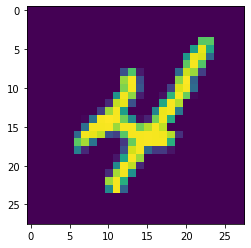

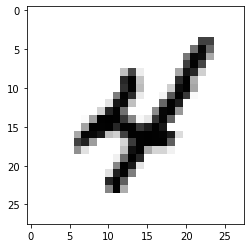

In [16]:
## just check the graph, how data Looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[9])
plt.show() ## in order to execute the graph
## however we dont know whether its color image or binary images
## so in order to plot it change the configuration
plt.imshow(x_train[9], cmap = plt.cm.binary)

## checking the values of each pixel
## before normalization

In [17]:
print(x_train[9])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 189 190   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 143 247 153   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 136 247 242  86   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 192 252 187   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  62 185  18   


## Normalizing the data | Pre-Processing Step

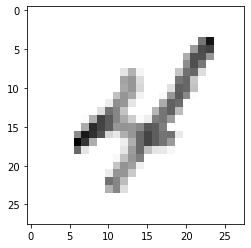

In [19]:
### you might have noticed that, its gray image and all values varies from 0 to 255
### in order to normalize it
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[9], cmap = plt.cm.binary)

In [20]:
print(x_train[9])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:
print(y_train[9])

4


## resizing image for convolution operation

In [29]:
import numpy as np  # pip install numpy
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  ### increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    ### increasing one dimension for kernel operation
print("Training Samples dimension", x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)


Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## creating CNN
## training MNIST 

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [33]:
### Creating a neural network now

model = Sequential()


### First Convolution Layer
model.add(Conv2D(64, (3, 3), input_shape=x_trainr.shape[1:])) # Corrected input shape
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

### 2nd Convolution Layer
model.add(Conv2D(64, (3, 3))) ### 26+3-1 = 24x24
model.add(Activation("relu")) ### activation funtion
model.add(MaxPooling2D(pool_size=(2,2))) ### MAXpooling

### 3rd Convolution Layer
model.add(Conv2D(64, (3, 3))) # 24*24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Fully Connected Layer #1 20x20= 400
model.add(Flatten()) ### before using fully connected Layer, need to be flatten so that 2D to 1D
model.add(Dense(64)) #
model.add(Activation("relu"))

### Fully Connected Layer #2
model.add(Dense(32))
model.add(Activation("relu"))

### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) # this last dense layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax (class probabilities )


In [34]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

In [35]:
print("Total Training Samples = ", len(x_train))

Total Training Samples =  60000


In [36]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [37]:
model.fit(x_trainr, y_train, epochs=5, validation_split=0.3) ## train model

Epoch 1/5
1313/1313 [==============================] - 29s 21ms/step - loss: 0.3126 - accuracy: 0.9016 - val_loss: 0.1233 - val_accuracy: 0.9607
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0993 - accuracy: 0.9692 - val_loss: 0.1094 - val_accuracy: 0.9654
Epoch 3/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0723 - accuracy: 0.9773 - val_loss: 0.0729 - val_accuracy: 0.9781
Epoch 4/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0555 - accuracy: 0.9827 - val_loss: 0.0638 - val_accuracy: 0.9818
Epoch 5/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0443 - accuracy: 0.9859 - val_loss: 0.0548 - val_accuracy: 0.9848


In [117]:
### Evaluating on testing data set MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)


313/313 [==============================] - 1s 5ms/step - loss: 0.0534 - accuracy: 0.9842
Test Loss on 10,000 test samples 0.053410205990076065
Validation Accuracy on 10,000 test samples 0.9842000007629395


In [118]:
# predictions = new_model.predict([x_test]) ## there is specialized method for efficiently saving your model, to name all inputs
### therefore instead of using new model Loaded, for now only for predictions I am using simple model
predictions = model.predict([x_testr])


313/313 [==============================] - 1s 4ms/step


In [119]:
print(predictions) ## actually these predictions are based on one hot encoding so these are only arrays, containing softmax probabilities

[[1.73667196e-08 1.31061893e-06 5.39222583e-07 ... 9.99995649e-01
  5.87856830e-09 1.29632474e-06]
 [4.37049266e-06 4.14375705e-07 9.99981344e-01 ... 1.34627835e-05
  4.34810481e-08 8.78195578e-08]
 [5.74470107e-07 9.99982774e-01 4.52203386e-09 ... 7.12167639e-06
  8.69102394e-07 2.21096707e-06]
 ...
 [1.21157650e-11 3.19449282e-06 1.47666555e-08 ... 1.88995432e-06
  9.28284862e-06 2.46078107e-05]
 [1.43117022e-05 4.53932535e-06 7.43146487e-08 ... 2.69375931e-07
  8.04035168e-04 1.92124917e-05]
 [2.38590655e-05 7.97821098e-09 2.74336326e-05 ... 8.76124773e-07
  1.51486001e-05 2.53624803e-05]]


In [120]:
# in order to understand, convert the predictions from one hot encoding, we need to use numpy for that
print(np.argmax(predictions[1])) ### so actually argmax will return the maximum value index and find the value of it

2


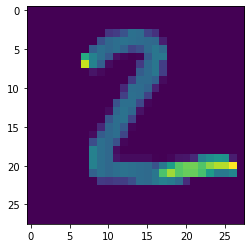

In [121]:
### now to check that is our answer is true or not
plt.imshow(x_test[1])

In [47]:
pip install opencv-python

     |████████████████████████████████| 54.7 MB 107.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
import cv2

In [84]:
image = cv2.imread('four.png')

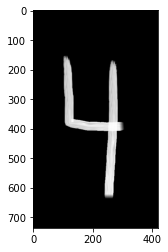

In [85]:
plt.imshow(image)

In [86]:
image.shape

(736, 422, 3)

In [87]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [88]:
gray.shape

(736, 422)

In [89]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [90]:
resized.shape

(28, 28)

In [91]:
newimg = tf.keras.utils.normalize(resized, axis = 1)  # 0 to 1 scaling

In [92]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # kernel operation of convolution layer,

In [93]:
newimg.shape

(1, 28, 28, 1)

In [94]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 28ms/step


In [95]:
print(np.argmax(predictions))

4


In [97]:
image = cv2.imread('six.png')

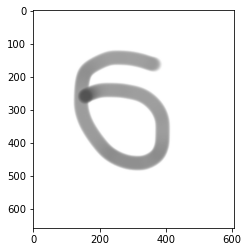

In [98]:
plt.imshow(image)

In [99]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
newimg = tf.keras.utils.normalize(resized, axis = 1)  # 0 to 1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # kernel operation of convolution layer,

In [100]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 20ms/step


In [101]:
print(np.argmax(predictions))

0


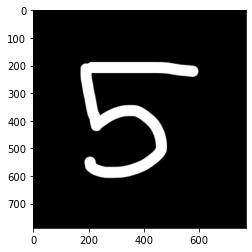

In [106]:
image = cv2.imread('five.png')
plt.imshow(image)

In [107]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
newimg = tf.keras.utils.normalize(resized, axis = 1)  # 0 to 1 scaling
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # kernel operation of convolution layer,

In [108]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 32ms/step


In [109]:
print(np.argmax(predictions))

5
